In [4]:
import matplotlib.pyplot as plt
import numpy as np


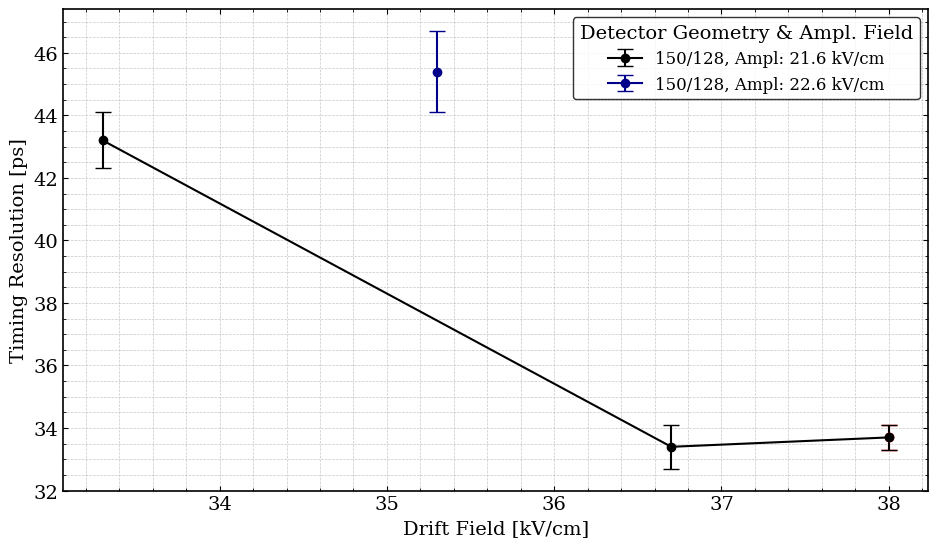

In [5]:
# ROOT-like style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "font.size": 14,
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "legend.frameon": True,
    "legend.edgecolor": "black"
})

# --- Data ---

# Format: (geometry, drift_field, ampl_field, timing_resolution, error)
raw_data = [
    ("150/128", 33.3, 21.6, 43.2, 0.9),
    ("150/128", 36.7, 21.6, 33.4, 0.7),
    ("150/128", 38.0, 21.6, 33.7, 0.4),
    ("150/128", 35.3, 22.6, 45.4, 1.3)
]

# Group data by (geometry, ampl_field)
from collections import defaultdict
grouped_data = defaultdict(lambda: {"x": [], "y": [], "err": []})

for geom, drift, ampl, time, err in raw_data:
    grouped_data[(geom, ampl)]["x"].append(drift)
    grouped_data[(geom, ampl)]["y"].append(time)
    grouped_data[(geom, ampl)]["err"].append(err)

# --- Plotting ---

fig, ax = plt.subplots(figsize=(10, 6))

# Marker style by geometry
marker_styles = {
    "120/50": 'o',
    "160/50": 's',
}

# Color map for amplification fields
color_map = {
    55: 'navy',
    57: 'green',
    52: 'darkorange',
    22.6: 'darkblue',
    21.4: 'darkgreen',
}

# Find max drift field for highlight
max_index = np.argmax([d[1] for d in raw_data])
highlight = raw_data[max_index]

# Plot each group
for (geom, ampl_field), data in grouped_data.items():
    marker = marker_styles.get(geom, 'o')
    color = color_map.get(ampl_field, 'black')

    # Determine if this series contains the max drift field
    if highlight[0] == geom and highlight[2] == ampl_field:
        for x, y, e in zip(data["x"], data["y"], data["err"]):
            if x == highlight[1] and y == highlight[3]:
                ax.errorbar(x, y, yerr=e, fmt=marker, color='red',
                            markersize=6, capsize=6)

    # Plot full line for this group
    label = f'{geom}, Ampl: {ampl_field} kV/cm'
    ax.errorbar(data["x"], data["y"], yerr=data["err"], fmt=marker + '-',
                color=color, capsize=6, markersize=6, label=label)

# Axis labels
ax.set_xlabel("Drift Field [kV/cm]")
ax.set_ylabel("Timing Resolution [ps]")

# Grid & visual style
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()


# Legend and layout
ax.legend(title="Detector Geometry & Ampl. Field", fontsize=12, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.96, 0.95])
# plt.show()
plt.savefig('timing_resolution_vs_drift_field_b4c.pdf', dpi=300, bbox_inches='tight')
